In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd


pd.set_option('display.max_columns', None)

Mounted at /content/drive


# Users

In [24]:
file_path = '/content/drive/MyDrive/Colab Notebooks/AI Final/users.dat'

# Define the column names
column_names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']

# Read the file into a DataFrame
users_df = pd.read_csv(file_path, sep='::', names=column_names, engine='python')

users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [33]:
print('Shape: ', users_df.shape, '\n')
users_df.info()

Shape:  (6040, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   object
 4   Zip-code    6040 non-null   object
 5   AgeGroup    6040 non-null   object
dtypes: int64(2), object(4)
memory usage: 283.2+ KB


In [25]:
users_statistics = {
    'Gender Distribution': users_df['Gender'].value_counts().to_dict(),
    'Age Distribution': users_df['Age'].value_counts().to_dict(),
    'Occupation Distribution': users_df['Occupation'].value_counts().to_dict(),
}
users_statistics

{'Gender Distribution': {'M': 4331, 'F': 1709},
 'Age Distribution': {25: 2096,
  35: 1193,
  18: 1103,
  45: 550,
  50: 496,
  56: 380,
  1: 222},
 'Occupation Distribution': {4: 759,
  0: 711,
  7: 679,
  1: 528,
  17: 502,
  12: 388,
  14: 302,
  20: 281,
  2: 267,
  16: 241,
  6: 236,
  10: 195,
  3: 173,
  15: 144,
  13: 142,
  11: 129,
  5: 112,
  9: 92,
  19: 72,
  18: 70,
  8: 17}}

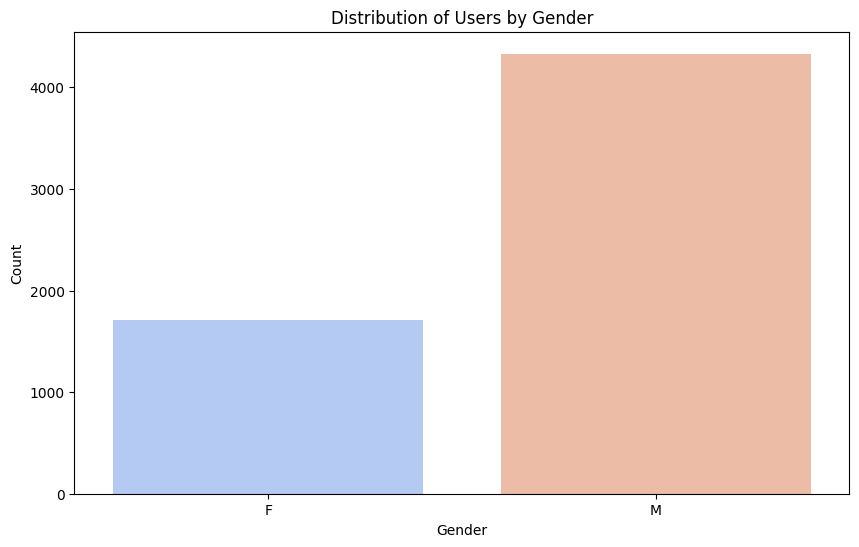

In [27]:
# Plotting the distribution of users by gender with a different color palette
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=users_df, palette='coolwarm')
plt.title('Distribution of Users by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

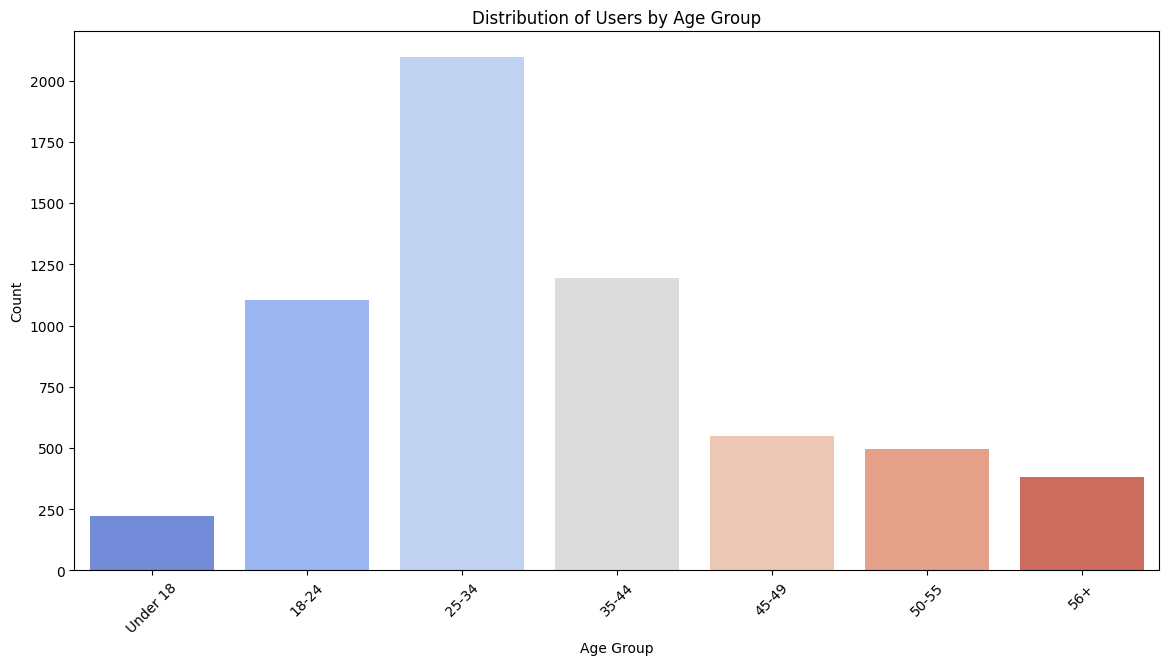

In [29]:
# Define the age groups
age_groups = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

# Map the ages to age groups
users_df['AgeGroup'] = users_df['Age'].apply(lambda x: next(value for key, value in sorted(age_groups.items(), reverse=True) if x >= key))

# Plotting the distribution of users by age group with a different color palette
plt.figure(figsize=(14, 7))
sns.countplot(x='AgeGroup', data=users_df, palette='coolwarm', order=["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"])
plt.title('Distribution of Users by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


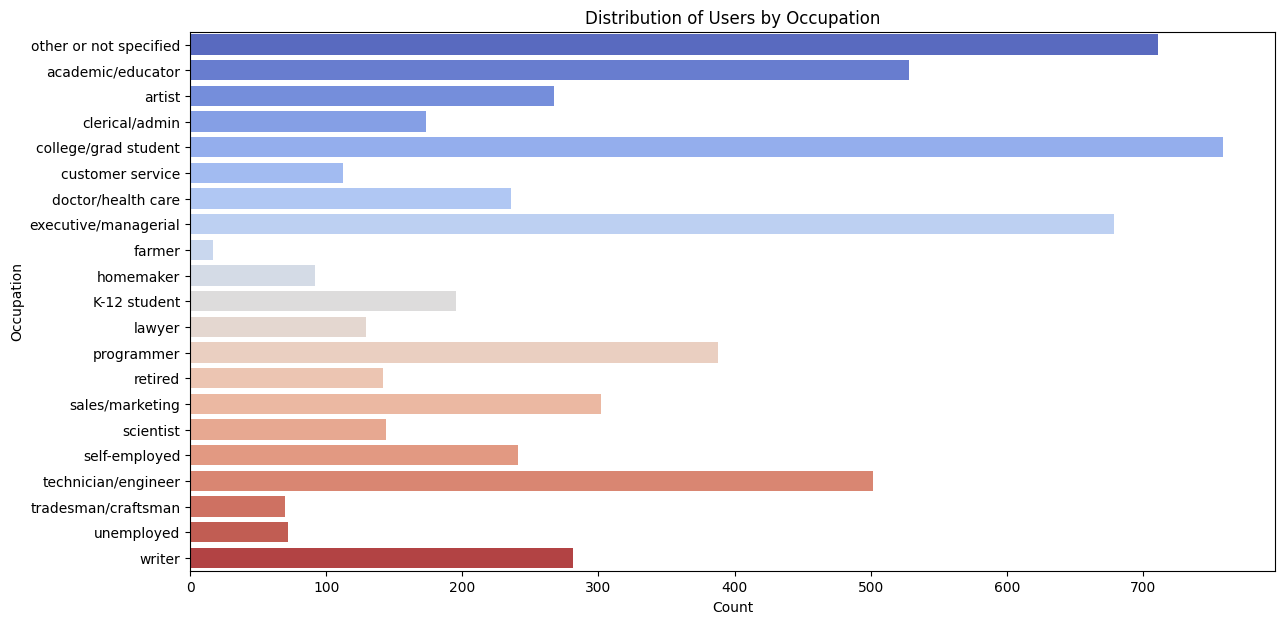

In [31]:
# Define the occupation groups
occupations = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

# Map the occupation codes to occupation names
users_df['Occupation'] = users_df['Occupation'].map(occupations)

# Plotting the distribution of users by occupation with a different color palette
plt.figure(figsize=(14, 7))
sns.countplot(y='Occupation', data=users_df, palette='coolwarm', order=[occupations[i] for i in range(21)])
plt.title('Distribution of Users by Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()


# Ratings

In [8]:
file_path = '/content/drive/MyDrive/Colab Notebooks/AI Final/ratings.dat'

# Define the column names
column_names = ['UserID', 'MovieID', 'Rating', 'Timestamp']

# Read the file into a DataFrame
ratings_df = pd.read_csv(file_path, sep='::', names=column_names, engine='python')

# Convert the Timestamp column to datetime
ratings_df['Timestamp'] = pd.to_datetime(ratings_df['Timestamp'], unit='s')

# Display the first few rows of the DataFrame
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


In [34]:
ratings_df

print('Shape: ', ratings_df.shape, '\n')
ratings_df.info()

Shape:  (1000209, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   UserID     1000209 non-null  int64         
 1   MovieID    1000209 non-null  int64         
 2   Rating     1000209 non-null  int64         
 3   Timestamp  1000209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 30.5 MB


As you can see the "ratings" dataframe has 4 columns.
* **userId** - Every user is represented by an unique Id.
* **movieId** - Every movie is represented by an uniue Id.
* **rating** - Represents the rating given by the user to the corresponding movie.
* **timestamp** - The time at which the rating was recorded.

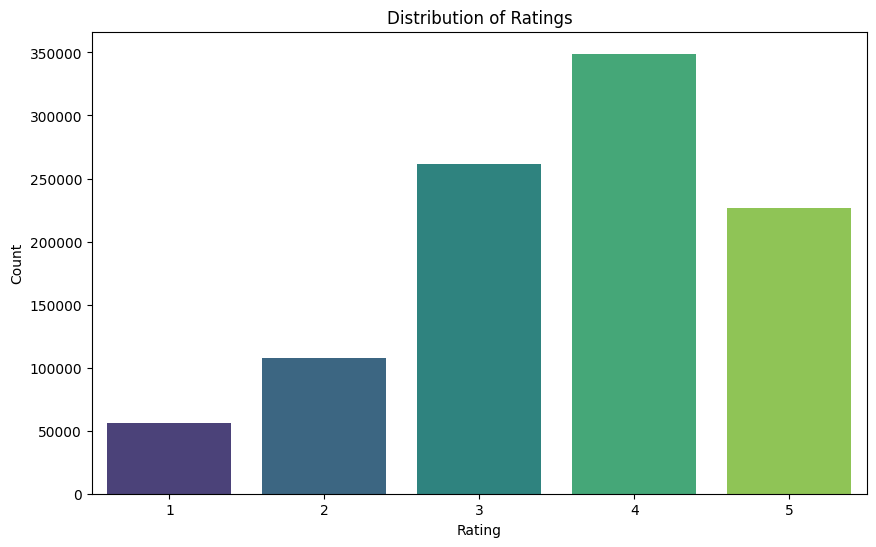

In [9]:
#Plot for the ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=ratings_df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

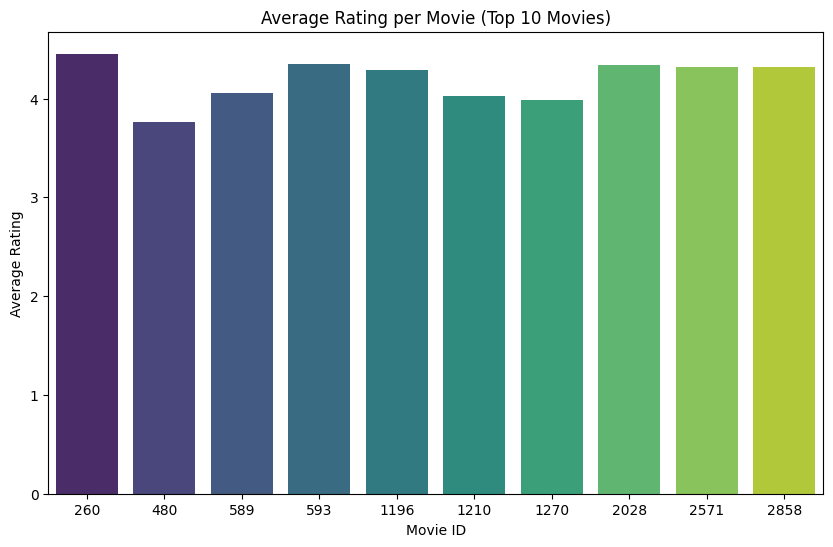

In [10]:
# Average Rating per Movie (Top 10 movies with the most ratings)
top_movies = ratings_df['MovieID'].value_counts().head(10).index
top_movies_df = ratings_df[ratings_df['MovieID'].isin(top_movies)]
avg_rating_top_movies = top_movies_df.groupby('MovieID')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='MovieID', y='Rating', data=avg_rating_top_movies, palette='viridis')
plt.title('Average Rating per Movie (Top 10 Movies)')
plt.xlabel('Movie ID')
plt.ylabel('Average Rating')
plt.show()